In [ ]:
#%matplotlib ipympl
#%load_ext autoreload
#%autoreload 2

In [2]:
from matplotlib import pyplot as plt
import pandas as pd

In [8]:
DATA_PATH = r"\\share\groups\E3\Diagnostik\DIA-3\QRH_PWI\experiment_analysis\BA Lisa Steiniger\Programmes\PythonScript_LisaSteiniger\BachelorthesisCode\inputFiles\Juice\\"

# general juice
#juice_op21 = pd.read_parquet(DATA_PATH + "adb_juice_op21_step_0.2_v2.6.parquet")
juice_op22 = pd.read_parquet(DATA_PATH + "adb_juice_op22_step_0.2_v0.9.parquet")
juice_op23 = pd.read_parquet(DATA_PATH + "adb_juice_op23_step_0.2_v1.0.parquet")

# HEXOS juice
hexos_op22 = pd.read_parquet(DATA_PATH + "juice_op22_step_0.2_QSD.parquet")
hexos_op23 = pd.read_parquet(DATA_PATH + "juice_op23_step_0.2_QSD.parquet")

ArrowMemoryError: malloc of size 2097152 failed

In [4]:
for k in hexos_op23.keys():
    print(k)

shot
t1
t_shot_start
t_shot_stop
t_in_shot
time_step
campaign
postboronization
w7xdia_version
archivedb_version
trace_total_1
sigma_trace_total_1
min_trace_total_1
max_trace_total_1
trace_C-VI_2.847nm_simpson
sigma_trace_C-VI_2.847nm_simpson
min_trace_C-VI_2.847nm_simpson
max_trace_C-VI_2.847nm_simpson
trace_C-VI_2.847nm_peak
sigma_trace_C-VI_2.847nm_peak
min_trace_C-VI_2.847nm_peak
max_trace_C-VI_2.847nm_peak
trace_C-VI_3.374nm_simpson
sigma_trace_C-VI_3.374nm_simpson
min_trace_C-VI_3.374nm_simpson
max_trace_C-VI_3.374nm_simpson
trace_C-VI_3.374nm_peak
sigma_trace_C-VI_3.374nm_peak
min_trace_C-VI_3.374nm_peak
max_trace_C-VI_3.374nm_peak
trace_C-V_4.042nm_simpson
sigma_trace_C-V_4.042nm_simpson
min_trace_C-V_4.042nm_simpson
max_trace_C-V_4.042nm_simpson
trace_C-V_4.042nm_peak
sigma_trace_C-V_4.042nm_peak
min_trace_C-V_4.042nm_peak
max_trace_C-V_4.042nm_peak
trace_B-V_4.859nm_simpson
sigma_trace_B-V_4.859nm_simpson
min_trace_B-V_4.859nm_simpson
max_trace_B-V_4.859nm_simpson
trace_B-V_4.

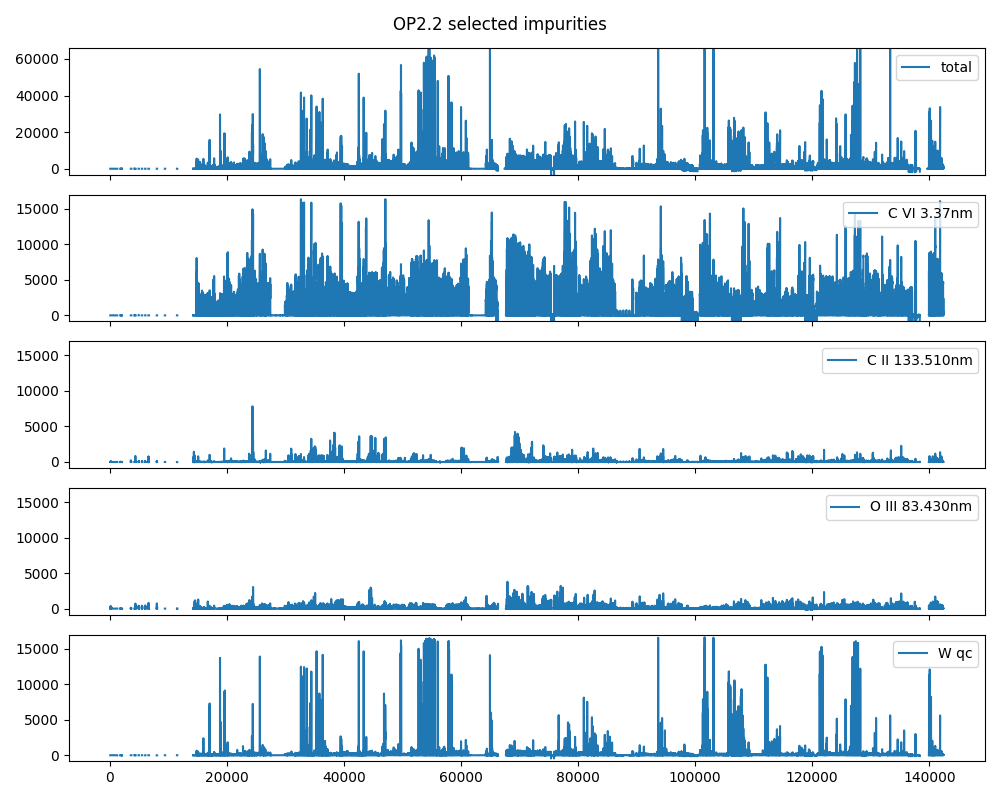

In [9]:
fh, ah = plt.subplots(5, 1, sharex=True, figsize=(10,8))

ax = 0
ah[ax].plot(hexos_op22['trace_total_1'].tolist(), label='total')
ah[ax].legend(loc='upper right')
ah[ax].set_ylim([-3300, 66000])

ax += 1
#ratio_CVI = hexos_op23['trace_C-VI_3.374nm_peak'] / hexos_op23['trace_total_1']
ah[ax].plot(hexos_op22['trace_C-VI_3.374nm_peak'].tolist(), label='C VI 3.37nm')
ah[ax].legend(loc='upper right')
ah[ax].set_ylim([-850, 17000])

ax += 1
ah[ax].plot(hexos_op22['trace_C-II_133.510nm_peak'].tolist(), label='C II 133.510nm')
ah[ax].legend(loc='upper right')
ah[ax].set_ylim([-850, 17000])

ax += 1
#ratio_Wqc = hexos_op23['trace_W-qc_5.180nm_peak'] / hexos_op23['trace_total_1']
ah[ax].plot(hexos_op22['trace_O-III_83.430nm_peak'].tolist(), label='O III 83.430nm')
ah[ax].legend(loc='upper right')
ah[ax].set_ylim([-850, 17000])

ax += 1
#ratio_Wqc = hexos_op23['trace_W-qc_5.180nm_peak'] / hexos_op23['trace_total_1']
ah[ax].plot(hexos_op22['trace_W-qc_5.180nm_peak'].tolist(), label='W qc')
ah[ax].legend(loc='upper right')
ah[ax].set_ylim([-850, 17000])

plt.suptitle('OP2.2 selected impurities')
plt.tight_layout()

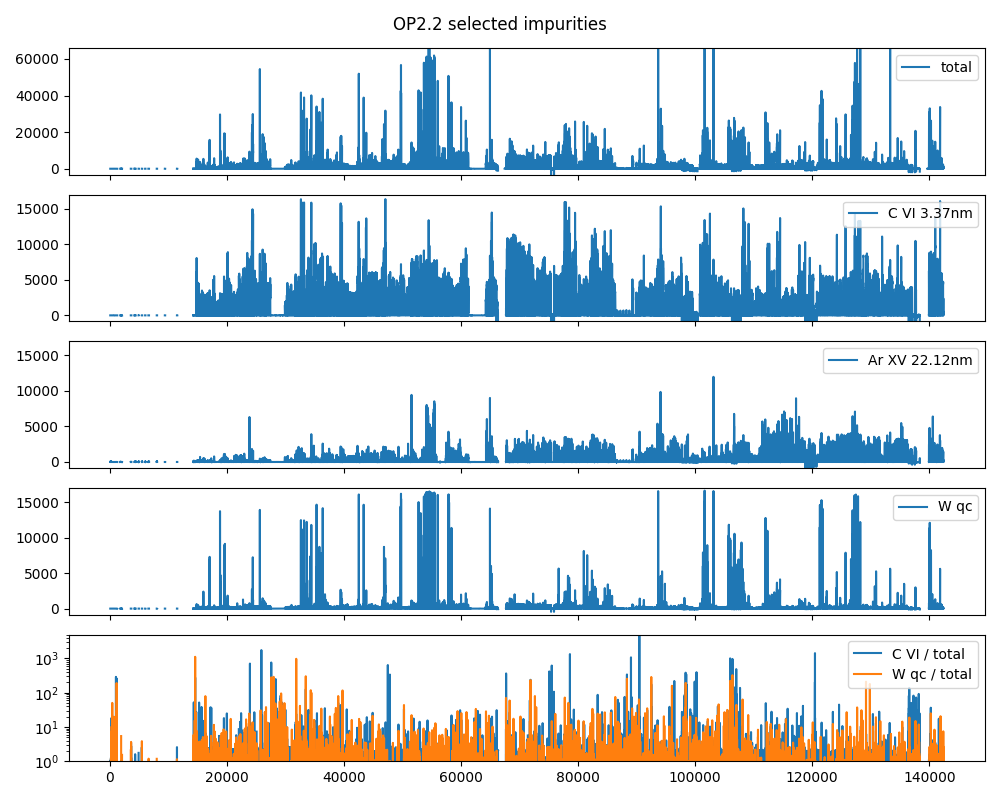

In [5]:
fh, ah = plt.subplots(5, 1, sharex=True, figsize=(10,8))
ax = 0

ah[ax].plot(hexos_op22['trace_total_1'].tolist(), label='total')
ah[ax].legend(loc='upper right')
ah[ax].set_ylim([-3300, 66000])

ax += 1
ratio_CVI = hexos_op22['trace_C-VI_3.374nm_peak'] / hexos_op22['trace_total_1']
ah[ax].plot(hexos_op22['trace_C-VI_3.374nm_peak'].tolist(), label='C VI 3.37nm')
ah[ax].legend(loc='upper right')
ah[ax].set_ylim([-850, 17000])

ax += 1
ah[ax].plot(hexos_op22['trace_Ar-XV_22.115nm_peak'].tolist(), label='Ar XV 22.12nm')
ah[ax].legend(loc='upper right')
ah[ax].set_ylim([-850, 17000])

ax += 1
ratio_Wqc = hexos_op22['trace_W-qc_5.180nm_peak'] / hexos_op22['trace_total_1']
ah[ax].plot(hexos_op22['trace_W-qc_5.180nm_peak'].tolist(), label='W qc')
ah[ax].legend(loc='upper right')
ah[ax].set_ylim([-850, 17000])

ax += 1
ah[ax].semilogy(ratio_CVI.tolist(), label='C VI / total')
ah[ax].semilogy(ratio_Wqc.tolist(), label='W qc / total')
ah[ax].legend(loc='upper right')
ah[ax].set_ylim([1, 5000])

plt.suptitle('OP2.2 selected impurities')
plt.tight_layout()

# HEXOS juice

In [ ]:
impurities = ['B', 'C', 'N', 'O', 'Ne', 'Ar', 'Ti', 'Fe', 'Cu', 'W']

#### single XP

In [ ]:
from w7xdia import extractor

shotname = '20250522.041'
time_step = 0.2 # integration window = 200 ms
timeout = 60    # seconds waited for a response from the archive before giving up

juice_oneshot = extractor.squeeze_shots([shotname], time_step = time_step, timeout = timeout,
                                        modules = [
                                            extractor.add_hexos,
                                            ],
                                        module_settings = {
                                            'hexos_select': True,
                                            'hexos_selection': impurities
                                            }
                                       )

#### single day

In [ ]:
from w7xdia import extractor

day = '2025-05-22'
time_step = 0.2
timeout = 30

qsd_juice = extractor.squeeze_day('2025-05-22',
                                  time_step=time_step,
                                  timeout=timeout,
                                  save_result=False,
                                  file_suffix="QSD",
                                  modules = [extractor.add_hexos],
                                  module_settings = {
                                      'hexos_select': True,
                                      'hexos_selection': impurities
                                      }
                                 )

#### multiple days / full campaign

In [ ]:
import pandas as pd
from w7xdia import extractor, campaigns
import datetime
import w7x_archdbaccess
logbook = w7x_archdbaccess.LogbookConnection()

_start = campaigns._op23_start
_end = campaigns._op23_end
_campaign = 'op23'

start_date = datetime.date(int(_start[:4]), int(_start[4:6]), int(_start[6:]))
end_date = datetime.date(int(_end[:4]), int(_end[4:6]), int(_end[6:]))
days = [[(start_date+datetime.timedelta(n)).year,
         (start_date+datetime.timedelta(n)).month,
         (start_date+datetime.timedelta(n)).day] for n in range(int((end_date-start_date).days)+1)]

juices = []
for day in days:
    _day = f"{day[0]:04d}-{day[1]:02d}-{day[2]:02d}"
    print(day[0], day[1], day[2])
    nprogs, programs = logbook.get_programs_of_day(day[0], day[1], day[2])
    if nprogs > 0 and any([xp['type'].upper() == 'PHYSICS' for xp in programs]):
        print('>>> processing', _day, f"({nprogs} XPs)")
        _juice = extractor.squeeze_day(_day,
                                       time_step=0.2,
                                       timeout=30,
                                       save_result=False,
                                       modules = [extractor.add_hexos],
                                       module_settings = {
                                           'hexos_select': True,
                                           'hexos_selection': impurities
                                           }
                                       )
        juices.append(_juice)
juices = pd.concat(juices)
pd.to_parquet("U:\\Documents\\W7-X\\juice-OP2\\juice_" + _campaign + "_step_0.2_QSD.parquet")

In [6]:
data = qsd_juice

In [ ]:
#%matplotlib ipympl
from matplotlib import pyplot as plt

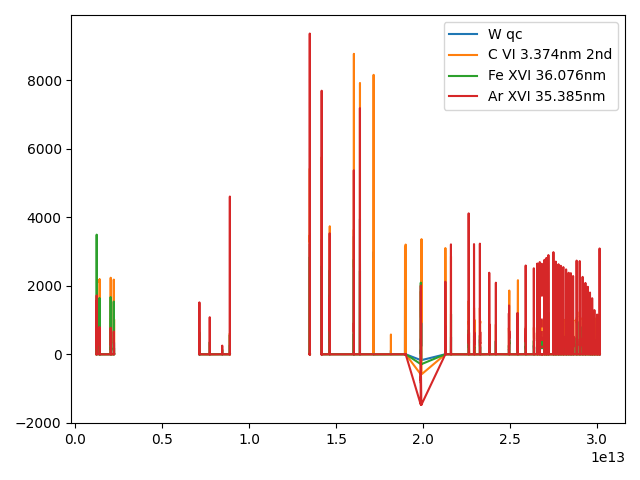

In [23]:
tt = data.index-data.iloc[[0]].index

plt.figure()
plt.plot(tt, data['trace_W-qc_5.180nm_peak'], label='W qc')
plt.plot(tt, data['trace_C-VI_6.748nm_peak'], label='C VI 3.374nm 2nd')
plt.plot(tt, data['trace_Fe-XVI_36.076nm_peak'], label='Fe XVI 36.076nm')
plt.plot(tt, data['trace_Ar-XVI_35.385nm_peak'], label='Ar XVI 35.385nm')
plt.legend()
plt.tight_layout()